In [ ]:
# Importing packages
library("tidyr")
library("ICSNP")
library("robustbase") #Qn and Sn
library("ggplot2") #Plotting
library("robets") #modified robets

: 

In [2]:
set.seed(seed = 10042022) #seed es la fecha
e <- rnorm(500, mean = 0, sd = 1) # error

alpha <- 0.5
beta <- 0.003
theta <- 0.9
m_1 <- 0
for (i in 2:length(e)) {
  m_1[i] <- alpha + beta * i + theta * m_1[i - 1] + e[i]
}
x_y <- m_1

In [3]:
contaminate <- function(data_cont, i){
  set.seed(seed = 13032022)
  e <- rnorm(1, mean = 0, sd = 1)
  i <- 0.1
  alfa <- round(length(data_cont) * i)
  for (j in seq(1, alfa, 1)) {
      w <- round(runif(1, 1, length(data_cont)))
      if (w %% 2 == 0) data_cont[w] <- data_cont[w] + e * 2
      else data_cont[w] <- data_cont[w] - e * 2
  }
  return(data_cont)
  }
data_cont_0.1 <- contaminate(m_1, 0.1)
data_cont_0.4 <- contaminate(m_1, 0.4)


In [4]:
# Psi function comparison
# Qn as scale estimator
# Data wirh 0 % Contamination
a <- c("Huber", "Bisquare", "Hampel", "Welsh1", "Welsh2")
l <- c()
m <- c()
for (i in a) {
  m_ahenao <- robets(x_y, model = "AAN", scale.estimator = "Qn", psifun = i)
  l[[paste0(i)]] <- m_ahenao$robaicc
  m[[paste0(i)]] <- m_ahenao
}
# l <- cbind(a, l)
# l <- rbind(c("psifun", "lik", "aic", "bic", "aicc"), l)
print("SIMULATED DATA")
print(which.min(l))
# print(l)

[1] "SIMULATED DATA"
Huber 
    1 


In [5]:
# Psi function comparison
# Qn as scale estimator
# Data wirh 10 % Contamination
a <- c("Huber", "Bisquare", "Hampel", "Welsh1", "Welsh2")
l <- c()
for (i in a) {
  m_ahenao <- robets(data_cont_0.1, model = "AAN", scale.estimator = "Qn",
   psifun = i)
  l[[paste0(i)]] <- m_ahenao$robaicc
}
# l <- cbind(a, l)
# l <- rbind(c("psifun", "lik", "aic", "bic", "aicc"), l)
print("CONTAMINATED DATA WITH 0.1")
# print(l)
print(which.min(l))

[1] "CONTAMINATED DATA WITH 0.1"
Huber 
    1 


In [6]:
a <- c("Huber", "Bisquare", "Hampel", "Welsh1", "Welsh2")
l <- c()
for (i in a) {
  m_ahenao <- robets(data_cont_0.4, model = "AAN", scale.estimator = "Qn",
   psifun = i)
  l[[paste0(i)]] <- m_ahenao$robaicc
}
# l <- cbind(a, l)
# l <- rbind(c("psifun", "lik", "aic", "bic", "aicc"), l)
print("CONTAMINATED DATA WITH 0.4")
# print(l)
print(which.min(l))

[1] "CONTAMINATED DATA WITH 0.4"
Huber 
    1 


In [7]:
values <- c(27, 27, 7, 24, 39, 40, 24, 45, 36, 37, 31, 47, 16, 24, 6, 21,
35, 36, 21, 40, 32, 33, 27, 42, 14, 21, 5, 19, 31, 32, 19, 36,
29, 29, 24, 42, 15, 24, 21)
a <- c("Huber", "Bisquare", "Hampel", "Welsh1", "Welsh2")
l <- c()
for (i in a) {
  m_ahenao <- robets(values, model = "AAN", scale.estimator = "Qn",
   psifun = i)
  l[[paste0(i)]] <- m_ahenao$robaicc
}
# l <- cbind(a, l)
# l <- rbind(c("psifun", "lik", "aic", "bic", "aicc"), l)
print("Crevits simulated data (Outlier near end)")
print(which.min(l))

[1] "Crevits simulated data (Outlier near end)"
Welsh2 
     5 


In [8]:
get_best_psi <- function(x, model='AAN', scale.estimator='Qn', psifun='Huber') {
    a <- c("Huber", "Bisquare", "Hampel", "Welsh1", "Welsh2")
    for (i in a) {
        m_ahenao <- robets(x,
        model = model,
        scale.estimator = scale.estimator,
        psifun = i)
        l[[paste0(i)]] <- m_ahenao$robaicc
    }
    return(which.min(l))
}

Huber 
    1 


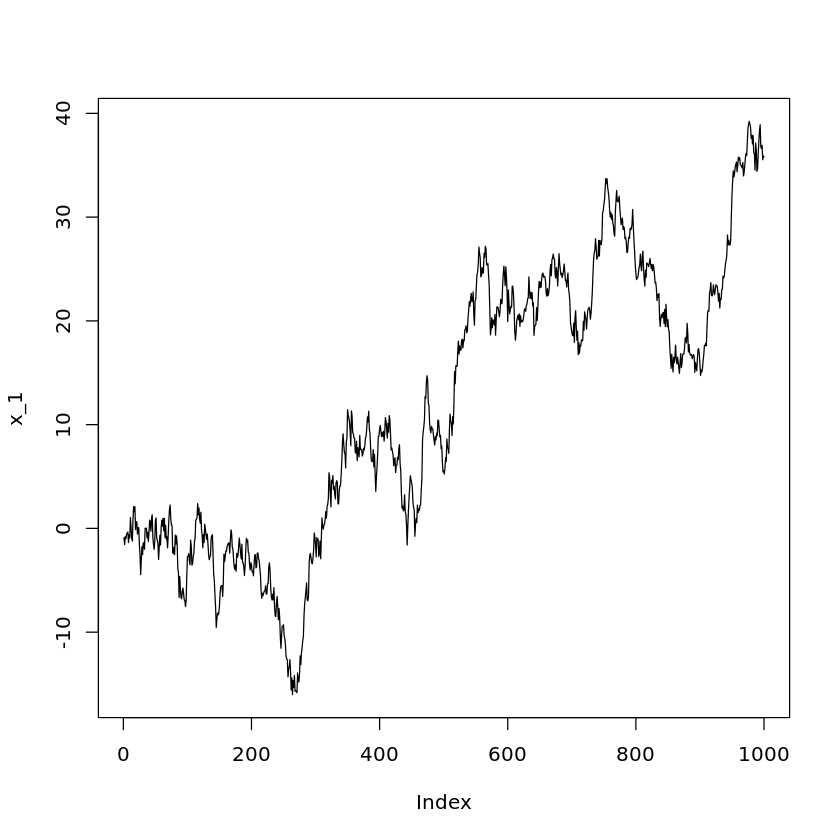

In [297]:
set.seed(180422)
M <- 1000;
x <- rnorm(M);
x_1 <- cumsum(x);
plot(x_1, type = "l")
print(get_best_psi(x_1))

In [9]:
set.seed(sample.int(100000, 1))
M <- 1000;
x <- rnorm(M);
x_1 <- cumsum(x);
print(get_best_psi(x_1))

Huber 
    1 


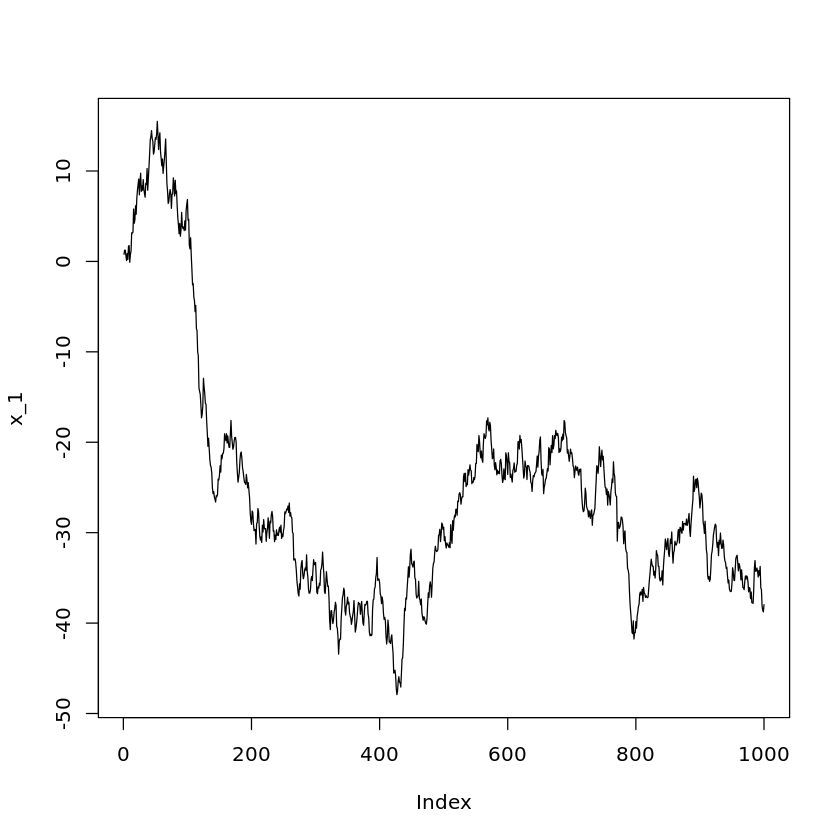

In [10]:
plot(x_1, type = "l")

In [11]:
generate_random_ts <- function(len) {
    s <- sample.int(100000, 1)
    set.seed(s)
    print(s)
    e <- rnorm(len, mean = 0, sd = 1) # error

    alpha <- runif(1, min = 0, max = 1)
    beta <- runif(1, min = 0.001, max = 0.01)
    theta <- runif(1, min = 0, max = 1)
    m_1 <- 0
    for (i in 2:length(e)) {
    m_1[i] <- alpha + beta * i + theta * m_1[i - 1] + e[i]
    }
    return(m_1)
}

[1] 36291
Welsh1 
     4 


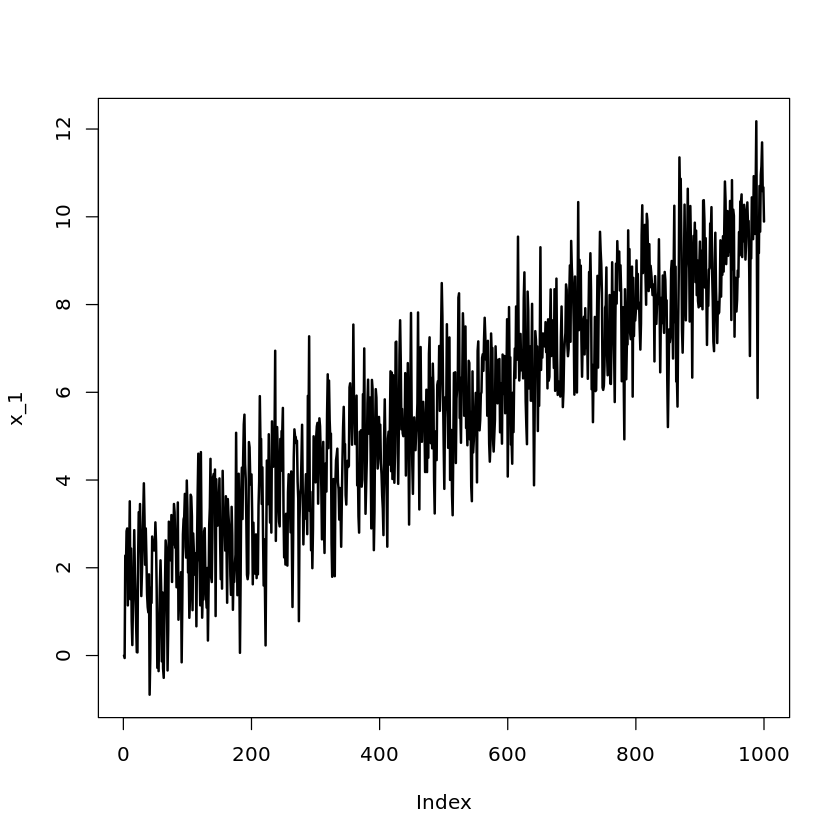

In [12]:
x_1 <- generate_random_ts(1000);
plot(x_1, type = "l", lwd = 2)
print(get_best_psi(x_1))

Huber 
    1 


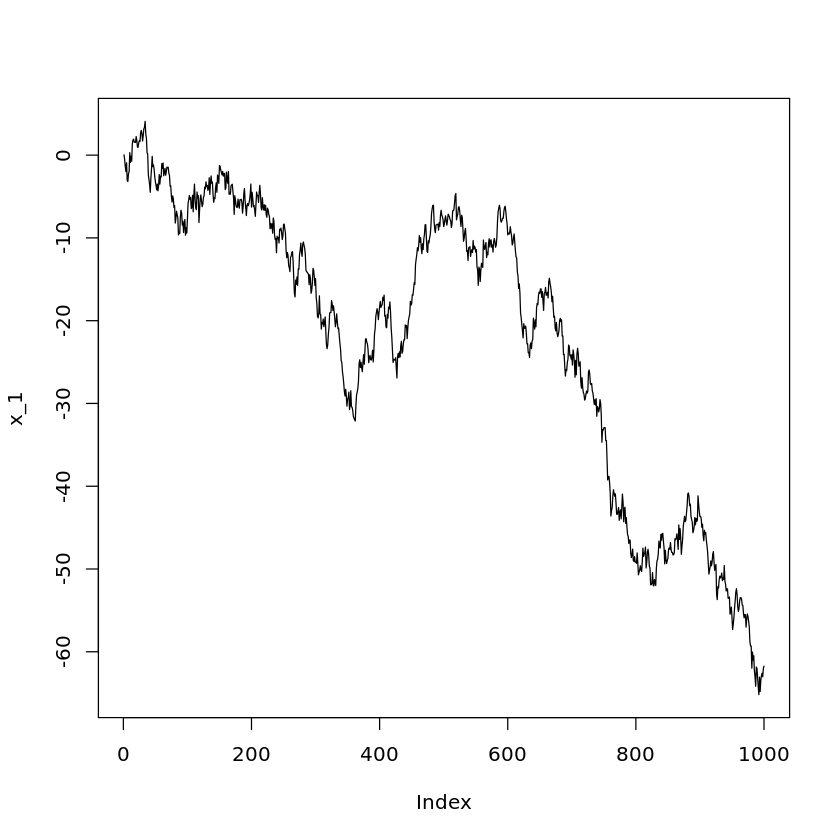

In [13]:
set.seed(150422)
M <- 1000;
x <- rnorm(M);
x_1 <- cumsum(x);
plot(x_1, type = "l")
print(get_best_psi(x_1))